<a href="https://colab.research.google.com/github/ghozieikhsanf/Pemrograman-Python/blob/main/GhozieIkhsanFairuz1101174489_Week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
NtL = lambda n: 10*np.log10(n)

In [3]:
LtN = lambda x: 10**(x/10)

In [5]:
def pathloss(fq,types,ht,hr,d):
  if fq in range(150,1501):
    Ca=69.55
    Cb=26.16
  elif fq in range(1501,2001):
    Ca=46.3
    Cb=33.9
  else:
    Ca = print("The given frequency does not meet the C1 criteria.")
    Cb = print("The given frequency does not meet the C2 criteria.")
    return Ca,Cb
  if types == 'urban' :
    cm=0
  elif types == 'suburban' :
    cm=-2*((np.log10((fq/28)**2))-5.4)
  elif types == 'open':
    cm=-4.78*(np.log10(fq))+18.33*(np.log10(fq))-40.94
  else:
    cm=print('The given area type(s) is not suitable for this parameter')
  ahr = (1.1*np.log10(fq)-0.7)*hr-(1.56*np.log10(fq)-1.8)
  Lp = Ca+(Cb*np.log10(fq))-(13.83*np.log10(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-cm
  return Lp

In [6]:
fq1=700 #in Mhz
fq2=900 #in Mhz
fq3=1800 #in MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #in m
user=1.5 #in m
dmin=300 #in m
dmax=1000 #in m
N=200 #dots
d=np.random.randint(dmin,dmax,N)
print(d)

[842 776 567 695 831 527 651 645 870 953 672 822 360 712 349 693 747 971
 537 814 597 313 691 833 621 637 597 864 926 668 651 647 971 910 863 511
 399 474 895 580 440 542 491 335 763 485 425 409 348 397 590 549 932 432
 307 861 727 528 707 638 841 948 356 664 694 522 983 532 401 399 728 731
 312 566 752 324 552 739 999 986 605 384 781 767 704 358 830 819 584 491
 487 505 484 712 481 653 447 726 834 965 674 939 889 629 955 456 529 476
 415 836 348 369 429 693 953 658 793 763 916 678 723 494 568 764 726 336
 510 933 641 906 824 626 442 815 875 501 867 877 620 559 701 541 909 767
 823 428 967 954 798 408 812 727 778 311 480 375 979 308 956 713 916 768
 772 334 793 742 578 431 369 882 310 954 779 529 390 907 506 484 704 687
 962 311 421 386 919 719 517 404 609 791 797 741 840 812 981 478 359 473
 404 506]


In [7]:
LpUrban=pathloss(fq3,loc1,tower,user,d)
LpSubUrban=pathloss(fq3,loc2,tower,user,d)
LpOpen=pathloss(fq3,loc3,tower,user,d)
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

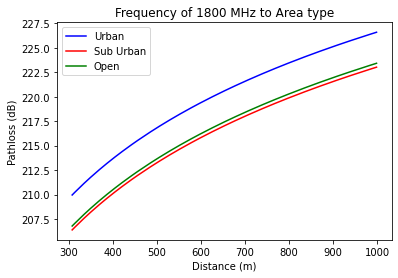

In [38]:
fig, ax = plt.subplots()
ax.plot(d_sort,Urban_sort, color='b', label='Urban')
ax.plot(d_sort,Suburban_sort, color='r', label='Sub Urban')
ax.plot(d_sort,Open_sort, color='g', label='Open')
ax.set_title('Frequency of 1800 MHz to Area type')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [9]:
LpUrbanFQ1=pathloss(fq1,loc1,tower,user,d)
LpUrbanFQ2=pathloss(fq2,loc1,tower,user,d)
LpUrbanFQ3=pathloss(fq3,loc1,tower,user,d)

In [10]:
d_sort=d[np.argsort(d)]
UrbanFQ_sort=LpUrbanFQ1[np.argsort(d)]
UrbanFQ2_sort=LpUrbanFQ2[np.argsort(d)]
UrbanFQ3_sort=LpUrbanFQ3[np.argsort(d)]

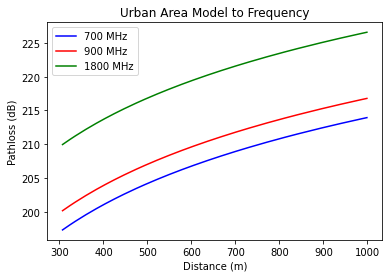

In [36]:
fig, ax = plt.subplots()
ax.plot(d_sort,UrbanFQ_sort, color='b', label='700 MHz')
ax.plot(d_sort,UrbanFQ2_sort, color='r', label='900 MHz')
ax.plot(d_sort,UrbanFQ3_sort, color='g', label='1800 MHz')
ax.set_title('Urban Area Model to Frequency')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [12]:
def ValuePrX(Ptx,Pl,Gtx,Grx):
  PtdB=NtL(Ptx)
  PrX=PtdB - Pl + Gtx + Grx
  PrXmW=LtN(PrX)
  return PrXmW

In [13]:
tx = 30000 # in miliwatt
Pla = Urban_sort
Plb = Suburban_sort
Plc = Open_sort
Pld = UrbanFQ_sort
Ple = UrbanFQ2_sort
Plf = UrbanFQ3_sort
gtx = 10 # in dB
grx = 2 # in dB

In [14]:
PrxUrban = ValuePrX(tx, Pla, gtx, grx)
PrxSubUrban = ValuePrX(tx, Plb, gtx, grx)
PrxOpen = ValuePrX(tx, Plc, gtx, grx)

In [15]:
PrxUrban700  = ValuePrX(tx, Pld, gtx, grx)
PrxUrban900  = ValuePrX(tx, Ple, gtx, grx)
PrxUrban1800 = ValuePrX(tx, Plf, gtx, grx)

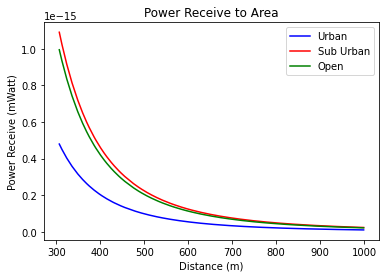

In [35]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban, color='b', label='Urban')
ax.plot(d_sort,PrxSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,PrxOpen, color='g', label='Open')
ax.set_title('Power Receive to Area')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()


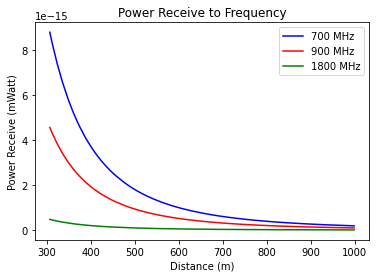

In [37]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban700, color='b', label='700 MHz')
ax.plot(d_sort,PrxUrban900, color='r', label='900 MHz')
ax.plot(d_sort,PrxUrban1800, color='g', label='1800 MHz')
ax.set_title('Power Receive to Frequency')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()


In [18]:
def SNRValue(Prx,BW):
  No=-174+10*np.log10(BW)
  NoW=LtN(No)
  SNR= Prx/NoW
  return SNR

In [19]:
Prx1 = PrxUrban
Prx2 = PrxSubUrban
Prx3 = PrxOpen
Prx4 = PrxUrban700
Prx5 = PrxUrban900
Prx6 = PrxUrban1800
BW   = 50000000


In [20]:
SNRUrban = SNRValue(Prx1,BW)
SNRSubUrban = SNRValue(Prx2,BW)
SNROpen = SNRValue(Prx3,BW)
SNRUrban700 = SNRValue(Prx4,BW)
SNRUrban900 = SNRValue(Prx5,BW)
SNRUrban1800 = SNRValue(Prx6,BW)


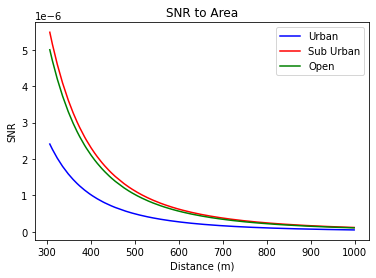

In [33]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban, color='b', label='Urban')
ax.plot(d_sort,SNRSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,SNROpen, color='g', label='Open')
ax.set_title('SNR to Area')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

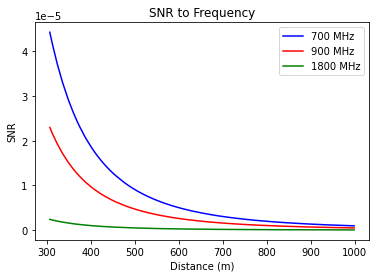

In [32]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban700, color='b', label='700 MHz')
ax.plot(d_sort,SNRUrban900, color='r', label='900 MHz')
ax.plot(d_sort,SNRUrban1800, color='g', label='1800 MHz')
ax.set_title('SNR to Frequency')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()


In [23]:
def Capacity(SNR,BW):
  Celcap = BW*np.log2(1+SNR)
  return Celcap

In [24]:
SNR1 = SNRUrban
SNR2 = SNRSubUrban
SNR3 = SNROpen
SNR4 = SNRUrban700
SNR5 = SNRUrban900
SNR6 = SNRUrban1800
BW   = 50000000

In [25]:
celcapUrban = Capacity(SNR1, BW)
celcapSubUrban = Capacity(SNR2, BW)
celcapOpen = Capacity(SNR3, BW)
celcapUrban700 = Capacity(SNR4, BW)
celcapUrban900 = Capacity(SNR5, BW)
celcapUrban1800 = Capacity(SNR6, BW)

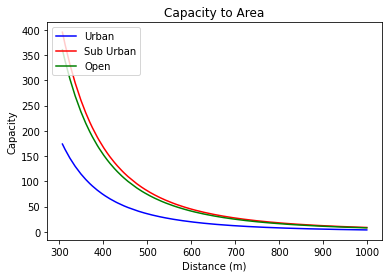

In [31]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban, color='b', label='Urban')
ax.plot(d_sort,celcapSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,celcapOpen, color='g', label='Open')
ax.set_title('Capacity to Area')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()

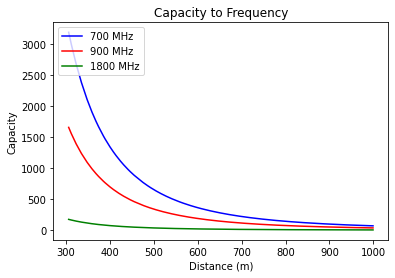

In [30]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban700, color='b', label='700 MHz')
ax.plot(d_sort,celcapUrban900, color='r', label='900 MHz')
ax.plot(d_sort,celcapUrban1800, color='g', label='1800 MHz')
ax.set_title('Capacity to Frequency')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()